In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [7]:
# create dataset
Synthetic_responses = [
"I love the sleek design of the car.",
"The car has excellent fuel efficiency.",
"The safety features in the car are top-notch.",
"The car's performance on the road is outstanding.",
"The interior of the car is spacious and comfortable.",
"I'm impressed with the advanced technology features in the car.",
"The car offers great value for the price.",
"The handling and maneuverability of the car are superb.",
"The car's infotainment system is user-friendly and intuitive.",
"I appreciate the ample storage space in the car.",
"The car's acceleration is impressive.",
"The sound system in the car provides excellent audio quality.",
"The car's exterior design is eye-catching.",
"I find the car to be reliable and dependable.",
"The car offers a smooth and comfortable ride.",
"The car's braking system is efficient and responsive.",
"The car's suspension provides a comfortable driving experience.",
"I like the variety of color options available for the car.",
"The car's maintenance costs are reasonable.",
"The car's warranty coverage is comprehensive.",
"The car's headlights offer excellent visibility at night.",
"The car's seats are ergonomic and supportive.",
"The car's handling in different weather conditions is impressive.",
"The car's fuel economy exceeds my expectations.",
"The car's safety ratings are reassuring.",
"The car's technology integration with smartphones is seamless.",
"I appreciate the car's spacious trunk capacity.",
"The car's design reflects a modern and stylish look.",
"The car's navigation system is accurate and reliable.",
"The car's interior materials are of high quality.",
"The car's climate control system provides optimal comfort.",
"The car's engine power is impressive.",
"I enjoy the panoramic sunroof in the car.",
"The car's audio system offers immersive sound quality.",
"The car's exterior color options are appealing.",
"The car's transmission provides smooth gear shifts.",
"The car's fuel efficiency allows for long drives without frequent refueling.",
"The car's resale value is competitive.",
"The car's seat comfort makes long trips enjoyable.",
"The car's entertainment options cater to all passengers.",
"The car's build quality feels sturdy and durable.",
"The car's technology features enhance the driving experience.",
"The car's suspension absorbs road bumps effectively.",
"The car's interior lighting creates a pleasant ambiance.",
"The car's handling in tight spaces is effortless.",
"I appreciate the car's safety assist features, such as blind-spot monitoring and lane-keeping assist.",
"The car's fuel tank capacity allows for extended driving range.",
"The car's acceleration from 0 to 60 mph is impressive.",
"The car's seating configuration offers flexibility for passengers and cargo.",
"The car's exterior design stands out from other vehicles on the road.",
"The car's engine noise is minimal during acceleration.",
"The car's parking assist system makes parking hassle-free.",
"The car's dashboard layout is intuitive and easy to navigate.",
"The car's high-quality materials give it a luxurious feel.",
"The car's safety features provide peace of mind.",
"The car's suspension system offers a smooth and comfortable ride.",
"I appreciate the car's fuel-saving start-stop feature.",
"The car's responsive steering enhances the driving experience.",
"The car's smartphone integration allows for seamless connectivity.",
"The car's seating configuration offers no flexibility for passengers and cargo.",
"The car's exterior design is old fashioned and boring.",
"The car's engine noise is horrible during acceleration.",
"The car's parking assist system is complicated",
"The car's dashboard layout is not intuitive and difficult to navigate.",
"The car's high-quality materials make it very expensive.",
"The car's safety features creates many doubts.",
"The car's suspension system offers is not smooth.",
"I appreciate the car's fuel-saving start-stop feature but it is irritating.",
"The car's steering is not responsive.",
"The car's smartphone integration works erratically."
]

In [8]:
# check length
len(Synthetic_responses)

70

In [9]:
# sentiment analysis, preprocess and create columns
sa = SentimentIntensityAnalyzer()
res, neg, neu, pos, com, sen = [], [], [], [], [], []
for i in Synthetic_responses:
    res.append(i.lower())
    neg.append(sa.polarity_scores(i)['neg'])
    neu.append(sa.polarity_scores(i)['neu'])
    pos.append(sa.polarity_scores(i)['pos'])
    com.append(sa.polarity_scores(i)['compound'])
    # instead of converting to numeric later; 1=positive,0=neutral,-1=negative
    if sa.polarity_scores(i.lower())['compound'] > 0.5:
        sen.append(1)
    elif sa.polarity_scores(i.lower())['compound'] < 0.25:
        sen.append(-1)
    else:
        sen.append(0)

In [10]:
# check length of arrays
len(res),len(neg),len(neu),len(pos),len(com),len(sen)

(70, 70, 70, 70, 70, 70)

In [13]:
# create df and display
column_names = ['Response','Negative','Neutral','Positive','Compound','Sentiment']
df = pd.DataFrame(columns=column_names)
df['Response'] = res

# remove stopwords
sw = set(stopwords.words("english"))
df['Response'] = df['Response'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))

df['Negative'] = neg
df['Neutral'] = neu
df['Positive'] = pos
df['Compound'] = com
df['Sentiment'] = sen
df.info(), df.describe(), df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Response   70 non-null     object 
 1   Negative   70 non-null     float64
 2   Neutral    70 non-null     float64
 3   Positive   70 non-null     float64
 4   Compound   70 non-null     float64
 5   Sentiment  70 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.4+ KB


(None,
         Negative    Neutral   Positive   Compound  Sentiment
 count  70.000000  70.000000  70.000000  70.000000  70.000000
 mean    0.021457   0.768771   0.209771   0.269463  -0.100000
 std     0.072788   0.194901   0.193222   0.312863   0.870615
 min     0.000000   0.360000   0.000000  -0.542300  -1.000000
 25%     0.000000   0.646000   0.000000   0.000000  -1.000000
 50%     0.000000   0.714000   0.253500   0.361200   0.000000
 75%     0.000000   1.000000   0.351000   0.510600   1.000000
 max     0.333000   1.000000   0.608000   0.757900   1.000000,
                                              Response  Negative  Neutral  \
 0                              love sleek design car.     0.000    0.588   
 1                      car excellent fuel efficiency.     0.000    0.392   
 2                      safety features car top-notch.     0.000    0.714   
 3                 car's performance road outstanding.     0.000    0.636   
 4                  interior car spacious comfort

In [15]:
# create data
X0 = df['Response']
y = df['Sentiment']
print(f"X: {X0.shape}\n{X0}\ny: {y.shape}\n{y}")

X: (70,)
0                                love sleek design car.
1                        car excellent fuel efficiency.
2                        safety features car top-notch.
3                   car's performance road outstanding.
4                    interior car spacious comfortable.
                            ...                        
65           car's safety features creates many doubts.
66               car's suspension system offers smooth.
67    appreciate car's fuel-saving start-stop featur...
68                           car's steering responsive.
69      car's smartphone integration works erratically.
Name: Response, Length: 70, dtype: object
y: (70,)
0     1
1     1
2     0
3     1
4     1
     ..
65    0
66   -1
67   -1
68   -1
69   -1
Name: Sentiment, Length: 70, dtype: int64


In [16]:
# encode data with Count Vectorizer and TFIDF Vectorizer
cV = CountVectorizer()
cV.fit(X0)
X = cV.transform(X0).toarray()
tV = TfidfVectorizer()
tV.fit(X0)
X1 = tV.transform(X0).toarray()
print(f"X Sparse: {X.shape}\n{X}\nX1 Sparse: {X1.shape}\n{X1}")

X Sparse: (70, 192)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
X1 Sparse: (70, 192)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.52719773]]


In [19]:
# data for models
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.2,random_state=42)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)
X1_res, y1_res = sm.fit_resample(X1_train,y1_train)
print(f"X_res: {X_res.shape}\n{X_res}\ny_res: {y_res.shape}\n{y_res}")
y_res.describe()

X_res: (75, 192)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_res: (75,)
0    -1
1     1
2    -1
3    -1
4     0
     ..
70    1
71    1
72    1
73    1
74    1
Name: Sentiment, Length: 75, dtype: int64


count    75.000000
mean      0.000000
std       0.821995
min      -1.000000
25%      -1.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Sentiment, dtype: float64

In [20]:
# GaussianNB
GNB = GaussianNB()
countV = GNB.fit(X_train,y_train)
tfidfV = GNB.fit(X1_train,y1_train)
count_pred_train = countV.predict(X_train)
tfidf_pred_train = tfidfV.predict(X1_train)
count_pred_test = countV.predict(X_test)
tfidf_pred_test = tfidfV.predict(X1_test)
print(f"y: {y_test.shape}\ny1: {y1_test.shape}")
print(f"count_pred: {count_pred_test.shape}\n{count_pred_test}\ntfidf_pred: {tfidf_pred_test.shape}\n{tfidf_pred_test}")

y: (14,)
y1: (14,)
count_pred: (14,)
[ 1 -1 -1  1  0 -1  1  1 -1 -1 -1  0  0 -1]
tfidf_pred: (14,)
[ 1 -1 -1  1  0  1  1  1 -1 -1 -1  0  0 -1]


Count Vectorizer
Train Accuracy: 0.9821428571428571
Test Accuracy: 0.5

TFIDF Vectorizer
Train Accuracy: 0.9464285714285714
Test Accuracy: 0.42857142857142855


<Axes: title={'center': 'TFIDF Vectorizer Confusion Matrix'}>

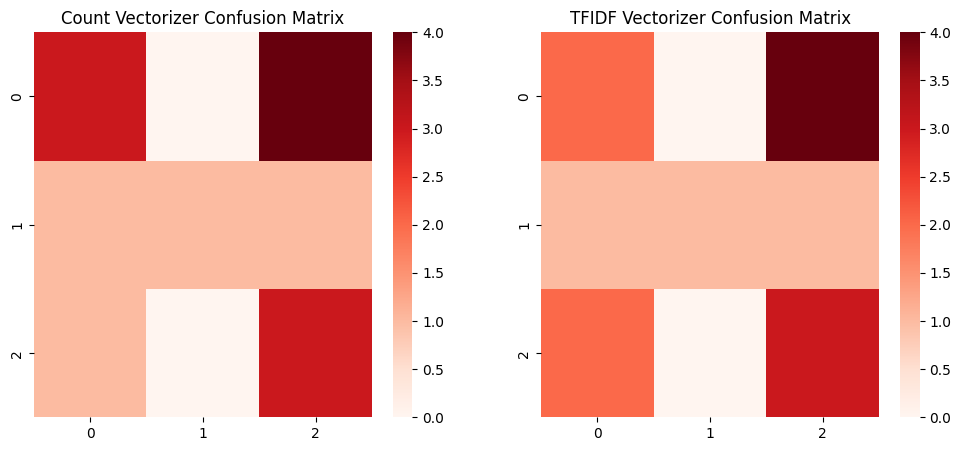

In [25]:
# check performance
cv_acc_train = accuracy_score(count_pred_train,y_train)
cv_acc_test = accuracy_score(count_pred_test,y_test)
tv_acc_train = accuracy_score(tfidf_pred_train,y1_train)
tv_acc_test = accuracy_score(tfidf_pred_test,y1_test)
cm_cv = confusion_matrix(count_pred_test,y_test)
cm_tv = confusion_matrix(tfidf_pred_test,y1_test)
print(f"Count Vectorizer\nTrain Accuracy: {cv_acc_train}\nTest Accuracy: {cv_acc_test}")
print(f"\nTFIDF Vectorizer\nTrain Accuracy: {tv_acc_train}\nTest Accuracy: {tv_acc_test}")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Count Vectorizer Confusion Matrix')
sb.heatmap(cm_cv,cmap='Reds')
plt.subplot(1,2,2)
plt.title('TFIDF Vectorizer Confusion Matrix')
sb.heatmap(cm_tv,cmap='Reds')

In [26]:
# new data
resp = pd.DataFrame(["The car is horrible",'The car smartphone integration works poorly',"The car is excellent","the car is ordinary"],columns=['Response'])
resp['Response'] = resp['Response'].str.lower()
resp['Response'] = resp['Response'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
resp

,Response
0,car horrible
1,car smartphone integration works poorly
2,car excellent
3,car ordinary


In [27]:
# predict on models
XT = resp['Response']
XTc = cV.transform(XT).toarray()
XTt = tV.transform(XT).toarray()
untrained_cV = countV.predict(XTc)
untrained_tV = tfidfV.predict(XTt)
print(f"Response:\n{resp['Response']}\nCount:\n{untrained_cV}\nTFIDF:\n{untrained_tV}")

Response:
0                               car horrible
1    car smartphone integration works poorly
2                              car excellent
3                               car ordinary
Name: Response, dtype: object
Count:
[-1 -1  1 -1]
TFIDF:
[-1 -1  1 -1]
